<a href="https://colab.research.google.com/github/rajadevineni/House_Price_Prediction/blob/master/KNN_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# **Loading the Data**

In [2]:
data =  pd.read_csv("data.csv")
make_prediction= pd.read_csv("make_prediction.csv")

In [3]:
print(data.shape)
print(make_prediction.shape)

(3000, 18)
(1552, 17)


In [37]:
pd.set_option('display.max_columns', 999)
data.head(20)

,Id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,1,591000.0,3,1.75,1680,2400,1.0,0,0,5,870,810,1922,1956,1600-1608 25th Ave,Seattle,WA 98122,USA
1,2,415000.0,4,2.25,3060,48787,2.0,0,0,3,3060,0,1992,0,31701-31799 SE 291st St,Ravensdale,WA 98051,USA
2,3,402000.0,3,2.50,1960,8000,1.0,0,0,4,1290,670,1977,0,12207 NE 139th Pl,Kirkland,WA 98034,USA
3,4,542525.0,4,2.50,2650,5600,2.0,0,0,3,2650,0,2014,0,13516 164th Ave SE,Renton,WA 98059,USA
4,5,515000.0,3,2.50,2010,7200,2.0,0,0,3,2010,0,1994,0,8818 NE 150th St,Kenmore,WA 98028,USA
5,6,692000.0,4,3.25,5010,34460,2.0,0,0,3,5010,0,1988,2000,6265 160th Ave SE,Bellevue,WA 98006,USA
6,7,650000.0,3,1.75,2920,9370,1.0,0,0,4,1620,1300,1981,0,14245 SE 60th St,Bellevue,WA 98006,USA
7,8,295000.0,4,2.00,980,10640,1.0,0,0,5,980,0,1978,0,17026 426th Ave SE,North Bend,WA 98045,USA
8,9,784000.0,3,3.50,3950,111078,1.5,0,0,3,2460,1490,1989,0,19851 NE Redmond Rd,Redmond,WA 98053,USA
9,10,706000.0,3,2.75,1900,6400,1.0,0,0,5,1410,490,1942,0,4324 NE 56th St,Seattle,WA 98105,USA


In [ ]:
make_prediction.head()

# **Visualizing Data**

In [6]:
data.describe()

,Id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,5.593498e+05,3.397000,2.158250,2134.094000,1.464680e+04,1.511333,0.008333,0.242000,3.447000,1821.023333,313.070667,1971.042667,792.034333
std,866.169729,6.346427e+05,0.910128,0.770071,946.966058,3.634340e+04,0.541420,0.090921,0.783352,0.674297,844.532322,466.736261,29.622874,976.379493
min,1.000000,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,750.750000,3.250000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,1500.500000,4.642500e+05,3.000000,2.250000,1975.000000,7.651000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,2250.250000,6.575000e+05,4.000000,2.500000,2630.000000,1.090125e+04,2.000000,0.000000,0.000000,4.000000,2303.000000,620.000000,1997.000000,1999.000000
max,3000.000000,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [40]:
X = data.drop(['price','Id','street','country'], axis=1)
y = data['price']

X.shape, y.shape


((3000, 14), (3000,))

## **1.	Determine, which features, are continuous vs categorical**

In [50]:
print("View:",set(X.view))
print("Floors:",set(X.floors))
print("Waterfront:",set(X.waterfront))
print("Condition:",set(X.condition))

View: {0, 1, 2, 3, 4}
Floors: {1.0, 2.5, 2.0, 3.0, 1.5, 3.5}
Waterfront: {0, 1}
Condition: {1, 2, 3, 4, 5}


In [60]:
cont_feat = ['bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',	'floors',	'waterfront',	'view',	'condition',	'sqft_above',	'sqft_basement', 'yr_built',	'yr_renovated']

### **Distribution of Bathrooms**

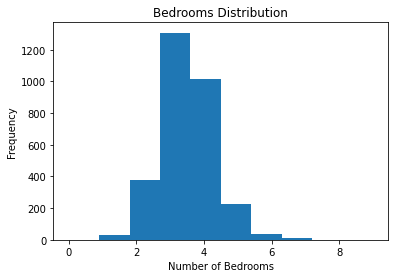

In [35]:
plt.hist(X.bedrooms, bins =10, )
plt.gca().set(title='Bedrooms Distribution', ylabel='Frequency', xlabel='Number of Bedrooms');

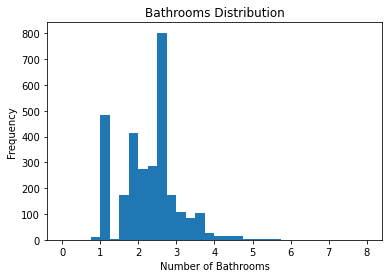

In [36]:
plt.hist(X.bathrooms, bins =32)
plt.gca().set(title='Bathrooms Distribution', ylabel='Frequency', xlabel='Number of Bathrooms');

Text(0, 0.5, 'Frequency')

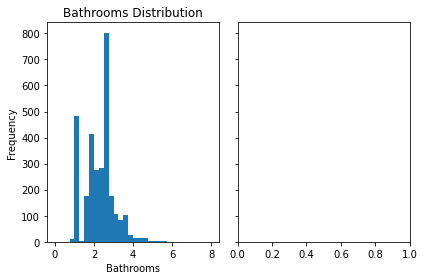

In [57]:
fig, axs = plt.subplots(3, 4, sharey=True, tight_layout=True)
axs[0].hist(X.bathrooms)
axs[0].set_title('Bathrooms Distribution')
axs[0].set_xlabel('Bathrooms')
axs[0].set_ylabel('Frequency')

In [59]:
print(axs[1])

AxesSubplot(0.558579,0.145139;0.398047x0.761806)


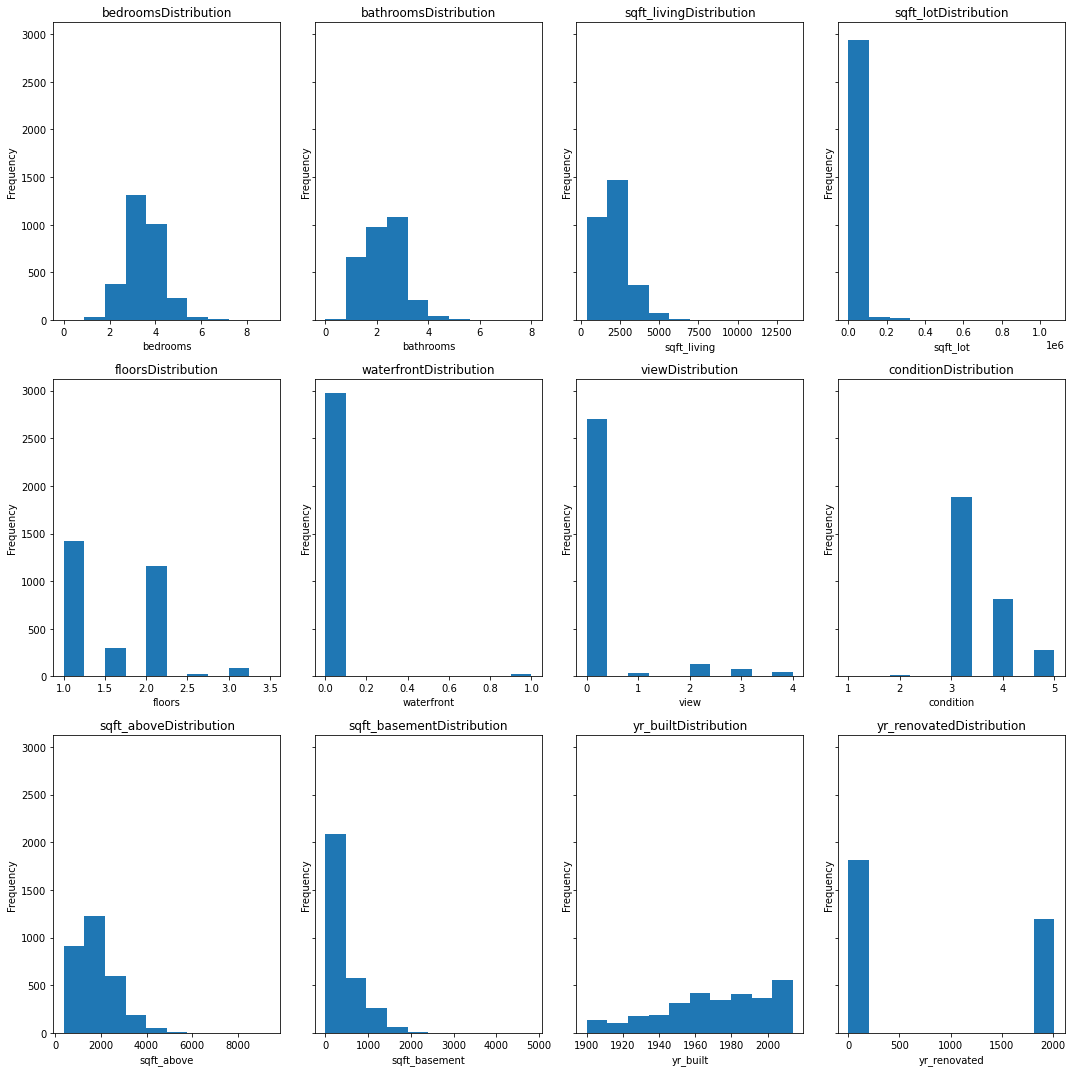

In [63]:
fig, axs = plt.subplots(3, 4, sharey=True, tight_layout=True, figsize=(15,15))
axs = axs.ravel()
for i in range(12):
    axs[i].hist(X[cont_feat[i]])
    axs[i].set_title(str(cont_feat[i])+ "Distribution")
    axs[i].set_xlabel(cont_feat[i])
    axs[i].set_ylabel('Frequency')